In [4]:
#Importamos librerias necesarias
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

#Conexion con la base de datos 
conn = sqlite3.connect('travel.sqlite')

In [5]:
vuelos_vendidos_mes = "SELECT aircraft_code AS 'CÓDIGO DE AVIÓN', COUNT(CASE WHEN scheduled_arrival LIKE '%2017-07%' THEN 1 END) AS 'VUELOS EN 2017-07', COUNT(CASE WHEN scheduled_arrival LIKE '%2017-08%' THEN 1 END) AS 'VUELOS EN 2017-08', COUNT(aircraft_code) AS 'VUELOS VENDIDOS' FROM flights WHERE scheduled_arrival LIKE '%2017-07%' OR scheduled_arrival LIKE '%2017-08%' AND status IN ('Arrived') GROUP BY aircraft_code ORDER BY COUNT(aircraft_code) DESC;"

Df_vvm = pd.read_sql_query(sql = vuelos_vendidos_mes, con = conn)
Df_vvm

,CÓDIGO DE AVIÓN,VUELOS EN 2017-07,VUELOS EN 2017-08,VUELOS VENDIDOS
0,CN1,2429,2248,4677
1,CR2,2378,2192,4570
2,SU9,2228,2065,4293
3,321,512,470,982
4,733,334,312,646
5,319,323,301,624
6,763,317,295,612
7,773,160,147,307


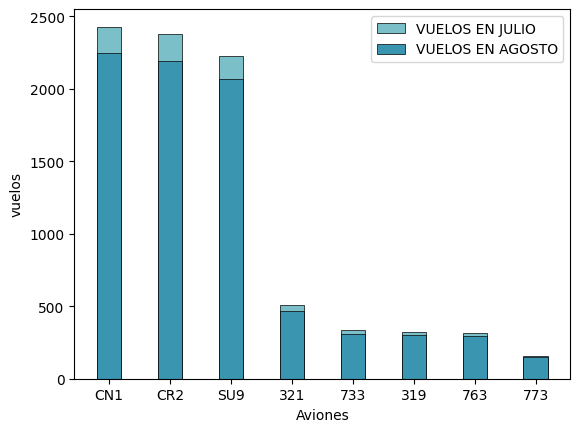

In [6]:
import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots()
x = Df_vvm['CÓDIGO DE AVIÓN']

MES7 = Df_vvm['VUELOS EN 2017-07']
MES8 = Df_vvm['VUELOS EN 2017-08']

plt.bar(x, MES7, 0.4, label = "VUELOS EN JULIO", color = "#7BBFC9", edgecolor = "black", linewidth = 0.5)
plt.bar(x, MES8, 0.4, label = "VUELOS EN AGOSTO", color = "#3A95B1", edgecolor = "black", linewidth = 0.5)


plt.xlabel("Aviones")
plt.ylabel("vuelos")


plt.legend()
plt.show()

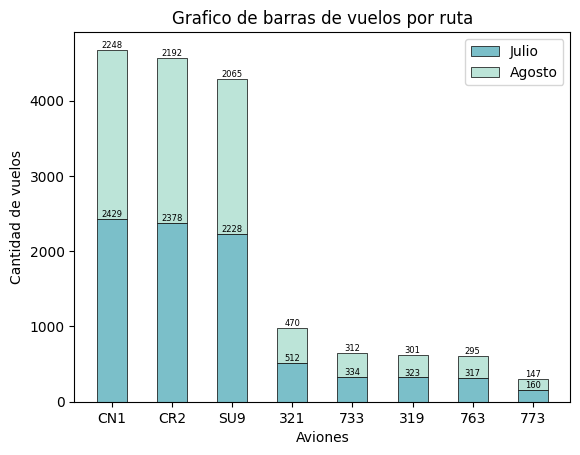

In [40]:
x = Df_vvm['CÓDIGO DE AVIÓN']
MES7 = Df_vvm['VUELOS EN 2017-07']
MES8 = Df_vvm['VUELOS EN 2017-08']

# Crear figura y ejes
fig, ax = plt.subplots()

# Crear barras acumuladas
ax.bar(x, MES7, 0.5, color = '#7BBFC9', edgecolor = "black", linewidth = 0.5, label='Julio')
ax.bar(x, MES8, 0.5, bottom=MES7, color = '#BCE4D8', edgecolor = "black", linewidth = 0.5, label='Agosto')

# Agregar valores a las barras
for i, (avion, vuelos_julio, vuelos_agosto) in enumerate(zip(x, MES7, MES8)):
    ax.text(i, vuelos_julio + 0.5, f"{vuelos_julio:.0f}", ha='center', va='bottom', fontsize=6)
    ax.text(i, vuelos_julio + vuelos_agosto + 0.5, f"{vuelos_agosto:.0f}", ha='center', va='bottom', fontsize=6)

# Configurar ejes y título
ax.set_xlabel('Aviones')
ax.set_ylabel('Cantidad de vuelos')
ax.set_title('Grafico de barras de vuelos por ruta')

# Mostrar leyenda
ax.legend()

# Mostrar gráfico
plt.show()

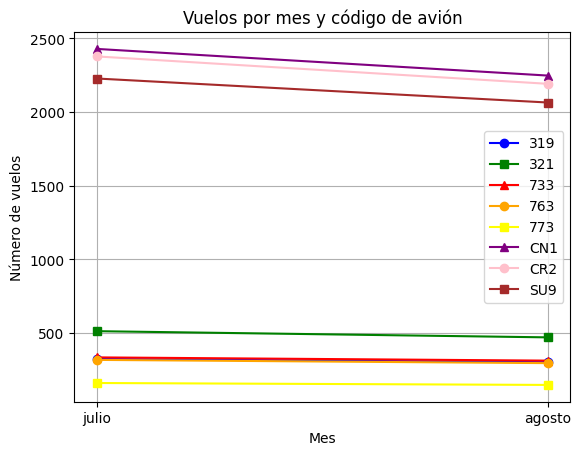

In [7]:
import matplotlib.pyplot as plt

# Datos de ejemplo
meses = ['julio','agosto']
vuelos_319 = [323, 301]
vuelos_321 = [512, 470]
vuelos_733 = [334, 312]
vuelos_763 = [317, 295]
vuelos_773 = [160, 147]
vuelos_CN1 = [2429, 2248]
vuelos_CR2 = [2378, 2192]
vuelos_SU9 = [2228, 2065]

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear la gráfica
plt.plot(meses, vuelos_319, label="319", marker='o', linestyle='-', color='blue')
plt.plot(meses, vuelos_321, label="321", marker='s', linestyle='-', color='green')
plt.plot(meses, vuelos_733, label="733", marker='^', linestyle='-', color='red')
plt.plot(meses, vuelos_763, label="763", marker='o', linestyle='-', color='orange')
plt.plot(meses, vuelos_773, label="773", marker='s', linestyle='-', color='yellow')
plt.plot(meses, vuelos_CN1, label="CN1", marker='^', linestyle='-', color='purple')
plt.plot(meses, vuelos_CR2, label="CR2", marker='o', linestyle='-', color='pink')
plt.plot(meses, vuelos_SU9, label="SU9", marker='s', linestyle='-', color='brown')


# Personalizar la gráfica
plt.xlabel("Mes")
plt.ylabel("Número de vuelos")
plt.title("Vuelos por mes y código de avión")
ax.grid(True)  # Agregar líneas de cuadrícula
ax.legend(loc='upper right')  # Mover la leyenda a la esquina superior derecha
plt.legend()


# Mostrar la gráfica
plt.show()

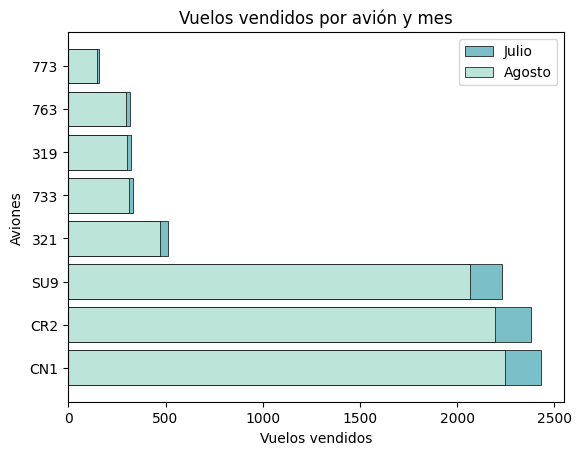

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Data
#vuelos_vendidos_julio = [160, 317, 323, 334, 512, 2228, 2378, 2429]
#vuelos_vendidos_agosto = [147, 295, 301, 312, 470, 2065, 2192, 2248]
#aviones = Df_vvm['CÓDIGO DE AVIÓN']

aviones = Df_vvm['CÓDIGO DE AVIÓN']
vuelos_vendidos_julio = Df_vvm['VUELOS EN 2017-07']
vuelos_vendidos_agosto = Df_vvm['VUELOS EN 2017-08']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar chart
ax.barh(aviones, vuelos_vendidos_julio, color='#7BBFC9', label='Julio', edgecolor = "black", linewidth = 0.5)
ax.barh(aviones, vuelos_vendidos_agosto, color='#BCE4D8', label='Agosto', edgecolor = "black", linewidth = 0.5)

# Set axis labels and title
ax.set_xlabel('Vuelos vendidos')
ax.set_ylabel('Aviones')
ax.set_title('Vuelos vendidos por avión y mes')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [11]:
alcance = "SELECT aircraft_code AS 'CODIGO DE AVION', range AS 'ALCANCE DEL AVION' FROM aircrafts_data ORDER BY range DESC;"

Df_alcance = pd.read_sql_query(sql = alcance, con = conn)
Df_alcance

,CODIGO DE AVION,ALCANCE DEL AVION
0,773,11100
1,763,7900
2,319,6700
3,320,5700
4,321,5600
5,733,4200
6,SU9,3000
7,CR2,2700
8,CN1,1200


Text(0.5, 1.0, 'Alcance por avión')

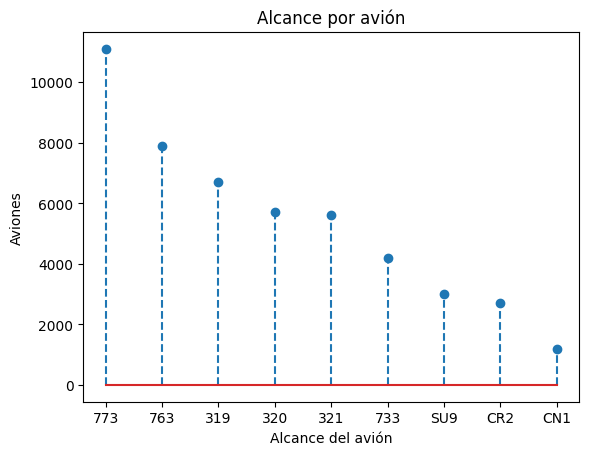

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = Df_alcance['CODIGO DE AVION']
y = Df_alcance['ALCANCE DEL AVION']

# Stem plot
fig, ax = plt.subplots()
ax.stem(x, y, linefmt = '--')

ax.set_xlabel('Alcance del avión')
ax.set_ylabel('Aviones')
ax.set_title('Alcance por avión')

# plt.show() 
